### First Submission
Data Science Nigeria 2021 AI Bootcamp Qualification Hackathon by Data Science Nigeria

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, SGDClassifier, RANSACRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, RobustScaler, Normalizer,\
Binarizer, FunctionTransformer
import seaborn as sns
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

#### 1. Read Data

In [140]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('samplesubmission.csv')

In [141]:
desc = train.describe().T
# miss = ((len(train) - desc['count']) /len(train)) * 100
high_std_cols = list(desc['std'][desc['std'] > 4].index)
high_std_cols

['Year_of_Birth',
 'Disposable_Income',
 'Recency',
 'Amount_on_Wines',
 'Amount_on_Fruits',
 'Amount_on_MeatProducts',
 'Amount_on_FishProducts',
 'Amount_on_SweetProducts',
 'Amount_on_GoldProds']

In [153]:
train.head(10)

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,...,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,01-08-2013,17,6,...,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,...,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,...,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,...,165,203,1,0,0,0,1,0,0,0
5,ID_3S3HRGH6,1960,Master,Married,41090.4,0,1,23-03-2014,32,1,...,0,1,5,0,0,0,0,0,0,0
6,ID_KJQ9B2LE,1953,Graduation,Single,86673.6,0,0,27-11-2012,94,1,...,14,56,3,0,0,0,0,0,0,0
7,ID_6O0NBZXD,1974,Graduation,Together,88711.2,0,0,02-03-2013,61,1,...,91,15,3,0,0,0,0,0,0,0
8,ID_M3QFT8WO,1966,Graduation,Together,35606.4,1,1,12-03-2013,13,1,...,4,8,6,0,0,0,0,0,0,0
9,ID_745JV5PY,1975,Graduation,Married,41305.2,1,0,01-07-2013,88,1,...,2,9,7,0,0,0,0,0,0,0


In [143]:
train.columns

Index(['ID', 'Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases',
       'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines',
       'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Response'],
      dtype='object')

In [144]:
test.head(5)

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,...,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,ID_ZPMABNVX,1954,Graduation,Single,48556.8,0,1,11-01-2013,85,6,...,7,23,41,8,0,0,0,0,0,0
1,ID_WFE91NAA,1961,Graduation,Widow,57499.2,0,1,22-11-2012,79,5,...,0,0,75,6,0,1,0,0,0,0
2,ID_JV11RBRK,1973,Basic,Married,17025.6,0,0,28-02-2013,47,1,...,16,12,27,6,0,0,0,0,0,0
3,ID_6B7SVKY9,1970,Graduation,Together,91983.6,0,0,16-08-2013,98,1,...,219,189,126,2,0,0,1,1,0,0
4,ID_GOVUZ545,1959,Graduation,Together,78235.2,0,2,25-07-2013,41,2,...,12,0,200,5,1,0,0,0,0,0


In [145]:
sample_submission.head(4)

,ID,Response
0,ID_ZPMABNVX,NaN
1,ID_WFE91NAA,NaN
2,ID_JV11RBRK,NaN
3,ID_6B7SVKY9,NaN


#### Data Exploration

In [147]:
train.shape, test.shape, sample_submission.shape

((1568, 27), (672, 26), (672, 2))

In [148]:
target = [cols for cols in train.columns if  cols not in test.columns]
target

['Response']

In [191]:
# train_copy = train.copy()
# for colname in train_copy.select_dtypes("object"):
#     train_copy[colname], _ = train_copy[colname].factorize()
# train_copy.fillna(train_copy['Disposable_Income'].mean(), inplace = True)
a  = (
    train.groupby("Marital_Status")  # for each state               # select the income
    .transform("mean")         # and compute its mean
    .round(2)
)
a

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,1967.27,64155.46,0.45,0.62,54.81,2.39,4.17,2.64,5.76,307.42,...,30.77,48.68,5.39,0.09,0.07,0.06,0.06,0.01,0.01,0.20
1,1968.80,64666.11,0.45,0.51,56.27,2.23,4.04,2.78,5.70,315.47,...,25.48,42.80,5.23,0.07,0.06,0.09,0.05,0.02,0.00,0.10
2,1973.29,59931.03,0.47,0.41,56.31,2.09,3.85,2.54,5.51,280.43,...,26.38,43.31,5.30,0.08,0.08,0.07,0.06,0.01,0.01,0.22
3,1973.29,59931.03,0.47,0.41,56.31,2.09,3.85,2.54,5.51,280.43,...,26.38,43.31,5.30,0.08,0.08,0.07,0.06,0.01,0.01,0.22
4,1970.73,61237.35,0.48,0.49,54.60,2.41,3.95,2.59,5.74,297.80,...,25.81,41.73,5.42,0.07,0.08,0.08,0.07,0.01,0.01,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,1970.73,61237.35,0.48,0.49,54.60,2.41,3.95,2.59,5.74,297.80,...,25.81,41.73,5.42,0.07,0.08,0.08,0.07,0.01,0.01,0.13
1564,1973.29,59931.03,0.47,0.41,56.31,2.09,3.85,2.54,5.51,280.43,...,26.38,43.31,5.30,0.08,0.08,0.07,0.06,0.01,0.01,0.22
1565,1970.73,61237.35,0.48,0.49,54.60,2.41,3.95,2.59,5.74,297.80,...,25.81,41.73,5.42,0.07,0.08,0.08,0.07,0.01,0.01,0.13
1566,1973.29,59931.03,0.47,0.41,56.31,2.09,3.85,2.54,5.51,280.43,...,26.38,43.31,5.30,0.08,0.08,0.07,0.06,0.01,0.01,0.22


In [10]:
y = train[target[0]]
y

0       0
1       0
2       1
3       0
4       0
       ..
1563    0
1564    0
1565    0
1566    0
1567    0
Name: Response, Length: 1568, dtype: int64

In [11]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
train['Disposable_Income'].fillna(train['Disposable_Income'].mean(), inplace = True)
test['Disposable_Income'].fillna(train['Disposable_Income'].mean(), inplace = True)

In [12]:
# train['Date_Customer'] = pd.to_datetime(train['Date_Customer'])
# test['Date_Customer'] = pd.to_datetime(test['Date_Customer'])
# train['Date_Customer']

In [13]:
train.describe()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
count,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,...,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000
mean,1970.073342,62381.186598,0.460459,0.497449,55.408801,2.292730,4.001276,2.665816,5.703444,303.190051,...,26.800383,43.739158,5.326531,0.072704,0.072704,0.080357,0.064413,0.012755,0.008291,0.152423
std,11.920781,31924.924495,0.540361,0.544151,28.788037,1.937544,2.773748,3.043493,3.260553,340.141396,...,40.857657,51.591557,2.468023,0.259733,0.259733,0.271932,0.245566,0.112252,0.090705,0.359546
min,1900.000000,2076.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,41801.400000,0.000000,0.000000,31.000000,1.000000,2.000000,0.000000,3.000000,27.000000,...,1.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1971.000000,61391.400000,0.000000,0.000000,56.000000,2.000000,3.000000,2.000000,5.000000,167.000000,...,8.000000,25.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1979.000000,81055.200000,1.000000,1.000000,80.000000,3.000000,6.000000,4.000000,8.000000,499.500000,...,33.000000,56.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1997.000000,799999.200000,2.000000,2.000000,106.000000,15.000000,27.000000,28.000000,13.000000,1498.000000,...,263.000000,362.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1568 non-null   object 
 1   Year_of_Birth            1568 non-null   int64  
 2   Education_Level          1568 non-null   object 
 3   Marital_Status           1568 non-null   object 
 4   Disposable_Income        1568 non-null   float64
 5   No_of_Kids_in_home       1568 non-null   int64  
 6   No_of_Teen_in_home       1568 non-null   int64  
 7   Date_Customer            1568 non-null   object 
 8   Recency                  1568 non-null   int64  
 9   Discounted_Purchases     1568 non-null   int64  
 10  WebPurchases             1568 non-null   int64  
 11  CatalogPurchases         1568 non-null   int64  
 12  StorePurchases           1568 non-null   int64  
 13  Amount_on_Wines          1568 non-null   int64  
 14  Amount_on_Fruits        

In [15]:
categorical_feat = list(train.select_dtypes(include = 'object').columns)
categorical_feat

['ID', 'Education_Level', 'Marital_Status', 'Date_Customer']

In [16]:
numerical_feat = list(train.select_dtypes(exclude = 'object').columns)
numerical_feat.remove('Response')

In [17]:
numerical_feat, len(numerical_feat)

(['Year_of_Birth',
  'Disposable_Income',
  'No_of_Kids_in_home',
  'No_of_Teen_in_home',
  'Recency',
  'Discounted_Purchases',
  'WebPurchases',
  'CatalogPurchases',
  'StorePurchases',
  'Amount_on_Wines',
  'Amount_on_Fruits',
  'Amount_on_MeatProducts',
  'Amount_on_FishProducts',
  'Amount_on_SweetProducts',
  'Amount_on_GoldProds',
  'WebVisitsMonth',
  'Cmp3Accepted',
  'Cmp4Accepted',
  'Cmp5Accepted',
  'Cmp1Accepted',
  'Cmp2Accepted',
  'Any_Complain'],
 22)

In [18]:
# label encoding 
# le = LabelEncoder()
# for i in categorical_feat:
#     train[i] = le.fit_transform(train[i])
#     test[i] = le.fit_transform(test[i])
# train.head()

In [19]:
# numerical_feat_to_choose = set(np.random.choice(numerical_feat, 20))
# numerical_feat_to_choose

### Feature Selection
Using Pearson Correlation

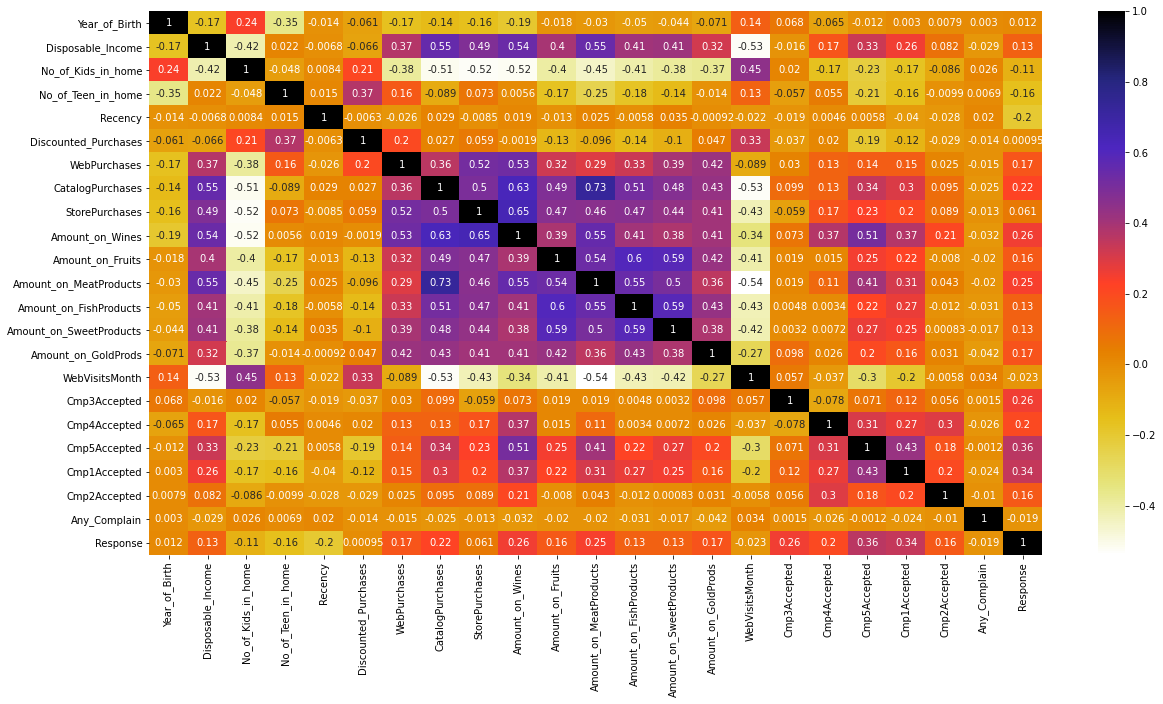

In [20]:
plt.figure(figsize = (20,10))
cor = train.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

#### Using the below function to select highly correlated features

In [21]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j] >= threshold):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [22]:
corr_features = correlation(train, 0.7)
len(corr_features)

1

In [23]:
train.drop(corr_features, axis = 1, inplace = True)
test.drop(corr_features, axis = 1, inplace = True)

In [24]:
numerical_feat.remove('Amount_on_MeatProducts')
high_std_cols.remove('Amount_on_MeatProducts')

In [25]:
absCorWithTarget = []
for var in train[numerical_feat]:
    absCorWithTarget.append(round(abs(y.corr(train[numerical_feat][var])),4))
cor_with_target = pd.DataFrame(absCorWithTarget, index = numerical_feat, columns = ['CorrWithTTarget'])
cor_with_target.head()

,CorrWithTTarget
Year_of_Birth,0.0123
Disposable_Income,0.1299
No_of_Kids_in_home,0.1086
No_of_Teen_in_home,0.1562
Recency,0.2017


#### Data Scaling

In [94]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(train[numerical_feat]), columns = numerical_feat)
testing = pd.DataFrame(scaler.fit_transform(test[numerical_feat]), columns = numerical_feat)
X

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,...,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,0.567010,0.094531,0.5,0.5,0.494949,0.133333,0.037037,0.035714,0.307692,0.044206,...,0.000000,0.022814,0.055249,0.15,0.0,0.0,0.0,0.0,0.0,0.0
1,0.597938,0.068563,0.0,0.5,0.101010,0.400000,0.185185,0.035714,0.615385,0.133958,...,0.193050,0.057034,0.052486,0.30,0.0,0.0,0.0,0.0,0.0,0.0
2,0.639175,0.127379,0.0,0.0,0.101010,0.000000,0.259259,0.142857,0.538462,0.310784,...,0.111969,0.068441,0.102210,0.10,0.0,0.0,0.0,1.0,0.0,0.0
3,0.814433,0.055438,0.5,0.0,0.424242,0.200000,0.148148,0.035714,0.230769,0.034159,...,0.065637,0.091255,0.066298,0.40,0.0,0.0,0.0,0.0,0.0,0.0
4,0.608247,0.107040,0.0,0.0,0.525253,0.066667,0.111111,0.250000,0.692308,0.272605,...,0.698842,0.627376,0.560773,0.05,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,0.721649,0.063687,0.5,0.5,0.171717,0.133333,0.074074,0.000000,0.230769,0.016075,...,0.007722,0.000000,0.011050,0.25,0.0,0.0,0.0,0.0,0.0,0.0
1564,0.824742,0.090377,0.0,0.5,0.565657,0.066667,0.148148,0.071429,0.615385,0.108506,...,0.212355,0.114068,0.074586,0.20,0.0,0.0,0.0,0.0,0.0,0.0
1565,0.536082,0.098733,0.0,0.5,0.676768,0.266667,0.074074,0.071429,0.692308,0.545881,...,0.042471,0.000000,0.193370,0.35,0.0,1.0,0.0,0.0,0.0,0.0
1566,0.659794,0.070966,0.5,0.5,0.212121,0.133333,0.037037,0.000000,0.307692,0.034829,...,0.000000,0.000000,0.002762,0.20,0.0,0.0,0.0,0.0,0.0,0.0


#### Defining Model
Since there are no Missing values we go straight to splitting our data for model fitting

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [171]:
# Train the Model
lr = LogisticRegression()
lr.fit(X_train, y_train)
# from sklearn.neighbors import KNeighborsClassifier

LogisticRegression()

In [172]:
# # Predict
# # We use both the 'X_train and X_test just to ensre we are not over fitting'
pred = lr.predict(X_test)

In [173]:
print('Testing set Evalution:')
print(f'Classifier f1_score value is: {f1_score(y_test, pred)}')

Testing set Evalution:
Classifier f1_score value is: 0.5950413223140495


In [119]:
precision_score(y_test, pred, average='micro')

0.9054054054054054

#### Submitting Section

In [102]:
prediction = lr.predict(testing)
submission_file = pd.DataFrame({'Id': test.ID, 'Response': prediction})
submission_file.reset_index(drop = True, inplace = True)
submission_file

,Id,Response
0,ID_ZPMABNVX,0
1,ID_WFE91NAA,0
2,ID_JV11RBRK,0
3,ID_6B7SVKY9,0
4,ID_GOVUZ545,0
...,...,...
667,ID_1D68PV28,0
668,ID_TM6CYFZO,0
669,ID_VHR666SC,0
670,ID_O852YAO1,0


<AxesSubplot:xlabel='Response', ylabel='count'>

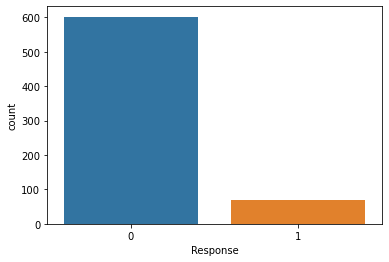

In [103]:
sns.countplot(x = 'Response', data = submission_file)

In [104]:
submission_file.to_csv('my_second9.csv', index = False)

#### LINEAR REGRESSION

In [37]:
from sklearn.datasets import make_regression, make_blobs, make_classification, make_circles
X,Y = make_regression(n_features = 1, noise = 10, n_samples = 1000)

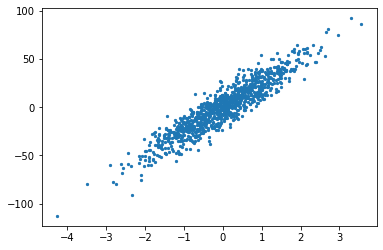

In [38]:
plt.scatter(X, Y, s=5)

In [39]:
lr = LinearRegression(normalize = False, n_jobs = 1,fit_intercept = True, copy_X = True)

In [40]:
ridge = Ridge(alpha = .1)

In [41]:
ridge.fit([[0,0],[0,0],[1,1]], [0,.1,1])

Ridge(alpha=0.1)

In [42]:
lr.fit([[0,0],[0,0],[1,1]], [0,.1,1])

LinearRegression(n_jobs=1)

In [43]:
ridge.coef_, lr.coef_

(array([0.44186047, 0.44186047]), array([0.475, 0.475]))

In [44]:
outliers = Y[950:] - 600
outliers

array([-590.91653468, -643.64007198, -543.57054312, -613.56291216,
       -598.97691663, -603.41890967, -596.29109018, -603.19131303,
       -625.0238772 , -618.69585228, -628.90627363, -590.61505175,
       -596.41571527, -616.35630811, -618.56589771, -633.90295756,
       -592.10867471, -598.73745885, -596.22236805, -579.19917023,
       -594.7014246 , -616.53704361, -560.06711014, -607.31388261,
       -598.79249475, -647.58435263, -582.01651978, -578.30852021,
       -586.6665067 , -625.99966585, -586.50840824, -620.87083449,
       -568.06243282, -596.83679803, -587.39336124, -633.62579206,
       -615.47897403, -610.20787693, -560.89900491, -655.4746532 ,
       -615.6109698 , -605.29141991, -621.61193542, -574.00228499,
       -640.987953  , -607.22166222, -614.8789214 , -598.04775321,
       -615.71277418, -587.65446322])

In [45]:
Y_out = np.append(Y[:950],outliers)

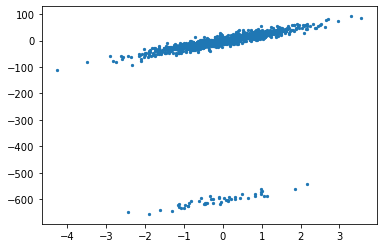

In [46]:
plt.scatter(X,Y_out, s=5)

In [47]:
A, b,w = make_regression(n_features = 10, noise = 10, n_samples = 10, coef = True, random_state = 1, bias = 3.5)
alphas = np.logspace(-6,6,200)
alphas[:20]

array([1.00000000e-06, 1.14895100e-06, 1.32008840e-06, 1.51671689e-06,
       1.74263339e-06, 2.00220037e-06, 2.30043012e-06, 2.64308149e-06,
       3.03677112e-06, 3.48910121e-06, 4.00880633e-06, 4.60592204e-06,
       5.29197874e-06, 6.08022426e-06, 6.98587975e-06, 8.02643352e-06,
       9.22197882e-06, 1.05956018e-05, 1.21738273e-05, 1.39871310e-05])

In [48]:
coefs = []
for a in alphas:
    ridge = Ridge(alpha = a, fit_intercept = True)
    ridge.fit(A,b)
    coefs.append(ridge.coef_)

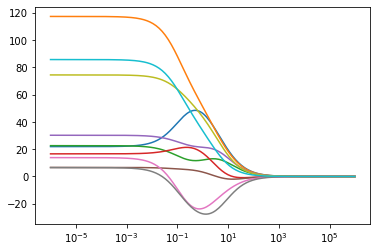

In [49]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.show()

#### LOGISTIC REGRESSION

In [50]:

C,d = make_blobs(n_features=2, n_samples = 1000, cluster_std = 2, centers=2)

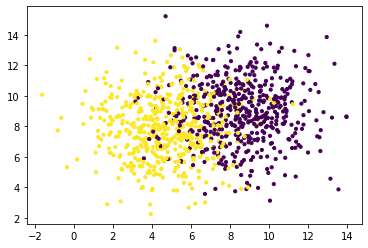

In [51]:
plt.scatter(C[:, 0], C[:, 1], s=10, c=d)

In [52]:
h = .02
x_min, x_max  = C[:, 0].min() - .5, C[:, 0].max() + .5
y_min, y_max  = C[:, 1].min() - .5, C[:, 1].max() + .5
                          
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [53]:
lr.fit(C,d)

LinearRegression(n_jobs=1)

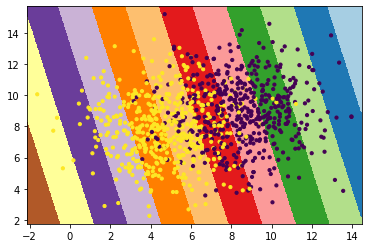

In [54]:
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z= Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Paired, shading='auto')
plt.scatter(C[:, 0], C[:, 1],c=d, s=10)

#### OUTLINE LEARNING MODELS

In [55]:
E,f = make_classification(n_classes=2, n_features=10, n_samples = 10000)

In [56]:
E_train,E_test,f_train,f_test = train_test_split(E,f)

In [57]:
sgd = SGDClassifier(n_iter_no_change = 10)

In [58]:
sgd.partial_fit(E_train[:1500], f_train[:1500], classes = [0,1])
sgd.score(E_test,f_test)

0.8852

In [59]:
sgd.partial_fit(E_train[1500:5000], f_train[1500:5000], classes = [0,1])
sgd.score(E_test,f_test)

0.886

### Robust Regression
fitting a regression in the presence of currupt data: either outliers, or error in the model

The techniques used are RANSAC, Theil and HuberRegressor

In [60]:
ransac = RANSACRegressor()
ransac.fit(C,d)

RANSACRegressor()

#### Polynomial Features

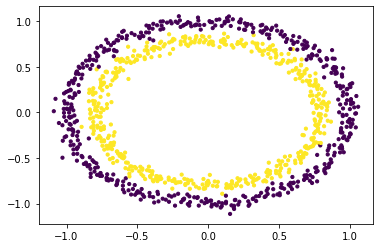

In [61]:
G,h = make_circles(n_samples=1000, noise=.04)
plt.scatter(G[:,0],G[:, 1], c=h, s=10)

In [62]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=2)

In [63]:
G_tf = pol.fit_transform(G)
G_tf[:5]

array([[ 1.00000000e+00,  8.86948793e-01,  4.97291230e-01,
         7.86678162e-01,  4.41071856e-01,  2.47298567e-01],
       [ 1.00000000e+00,  5.10613206e-01,  8.57927723e-01,
         2.60725846e-01,  4.38069225e-01,  7.36039978e-01],
       [ 1.00000000e+00, -1.78474569e-01, -9.55883394e-01,
         3.18531716e-02,  1.70600876e-01,  9.13713064e-01],
       [ 1.00000000e+00, -3.06003685e-02,  7.67924959e-01,
         9.36382549e-04, -2.34987867e-02,  5.89708743e-01],
       [ 1.00000000e+00, -8.93626870e-01, -4.77424289e-01,
         7.98568983e-01,  4.26639174e-01,  2.27933952e-01]])

In [64]:
pol_lr = LogisticRegression()
pol_lr = lr.fit(G_tf[:500], h[:500])
h.shape

(1000,)

In [65]:
G_pred = pol_lr.predict(G_tf[500:])
h_pred = np.where(G_pred > 1, 1,0)
pol_lr.score(G_tf[500:], h[500:])

0.8537487684205097

In [66]:
pol_lr.coef_

array([ 0.        , -0.00796865, -0.00431628, -2.39647143,  0.01183693,
       -2.37825188])

In [67]:
corpus = [
    'this is the first line',
    'this is the second line',
    'typing the third sentence',
]

#### Text Processing

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
cv  = CountVectorizer()

In [69]:
df = pd.DataFrame({
    'text': corpus
})
df

,text
0,this is the first line
1,this is the second line
2,typing the third sentence


In [70]:
cv.fit_transform(df.text).toarray()

array([[1, 1, 1, 0, 0, 1, 0, 1, 0],
       [0, 1, 1, 1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 1]], dtype=int64)

In [71]:
cv.vocabulary_

{'this': 7,
 'is': 1,
 'the': 5,
 'first': 0,
 'line': 2,
 'second': 3,
 'typing': 8,
 'third': 6,
 'sentence': 4}

In [72]:
from adspy_shared_utilities import load_crime_dataset
crime = load_crime_dataset()

ModuleNotFoundError: No module named 'adspy_shared_utilities'